In [1]:
import os
import sys
from dateutil.parser import parse
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', family='SimHei')
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 数据导入处理
清洗，timeslot处理过程

In [2]:
consum = pd.read_csv('../data/consumption.txt')
consum.drop(['id'], axis=1,inplace=True)
consum.dropna(subset=['place','student_id','brush_time'], inplace=True)
consum.fillna('',inplace=True)
consum['brush_time'] = pd.to_datetime(consum.brush_time)
consum['timeslot'] = '0'

In [11]:
import re
'''
null

# 沙河校区_ 沙河图书馆 只有1类

'''
pattern = [
    '电子科技大学_(\w{3})\dF.+',
    'null_(\w+)',
    '沙河校区_(\w+)',
    '电子科技大学_(.+)POS.+',
    '电子科技大学_(.+)收费.+',
    '(.+)_.+'  # general
]
def splitplace(x):
    res = x
    for p in pattern:
        if re.match(p, x):
            res = re.findall(p, x)[0]
            return res
    if x:
        print(x)
    return res
consum['place0'] = consum.place.apply(splitplace)
t, indexer = pd.factorize(consum.place0)
consum['placei'] = t

In [4]:
consum.index = consum.brush_time
'''
sleep 0:0 6:45
breakfast 6:45 8:30
morning 8:30 11:55
noon 11:55 14:30
afternoon 14:30 17:55
dinner 17:55
night 19:30
sleep 21:55
'''  
consum.loc[consum.between_time('0:0', '6:45', include_end=False).index, 'timeslot'] = 'sleep'
consum.loc[consum.between_time('6:45', '8:30', include_end=False).index, 'timeslot'] = 'breakfast'
consum.loc[consum.between_time('8:30', '11:55', include_end=False).index, 'timeslot'] = 'morning'
consum.loc[consum.between_time('11:55', '14:30', include_end=False).index, 'timeslot'] = 'noon'
consum.loc[consum.between_time('14:30', '17:55', include_end=False).index, 'timeslot'] = 'afternoon'
consum.loc[consum.between_time('17:55', '19:30', include_end=False).index, 'timeslot'] = 'dinner'
consum.loc[consum.between_time('19:30', '21:55', include_end=False).index, 'timeslot'] = 'night'
consum.loc[consum.between_time('21:55', '0:0', include_end=False).index, 'timeslot'] = 'sleep'
consum=consum.reset_index(drop=True)
# consum.drop(['place', 'campus', 'place0', 'device_id', 'brush_time'], axis=1, inplace=True)

### 数据统计
统计及可视化

In [12]:
consum.shape[0]*0.15

,student_id,card_id,brush_time,amount,remained_amount,trans_type,category,device_id,device_name,campus,place,timeslot,place0,placei
1,201321020302,201798,2015-09-01 00:00:04,0.40,12.63,POS消费,bath,000B83D2,淋浴,,硕士17#楼_硕士17#楼3F淋018,0,硕士17#楼,0
2,201422030116,263806,2015-09-01 00:00:05,0.80,24.16,POS消费,bath,000CC98A,淋浴,,电子科大沙河校区欣村公寓04#_欣村4,0,电子科大沙河校区欣村公寓04#,1
3,201321060411,259595,2015-09-01 00:00:08,0.50,41.99,POS消费,bath,000DA96D,淋浴,,硕士20#楼_硕士20#楼3F淋021,0,硕士20#楼,2
5,201521036013,331391,2015-09-01 00:00:09,0.40,138.10,POS消费,bath,000D4D75,淋浴,,电子科大沙河校区本部公寓17#_本部17#楼3F淋018,0,电子科大沙河校区本部公寓17#,3
6,201522035001,332090,2015-09-01 00:00:09,1.30,55.50,POS消费,bath,000D4D4A,淋浴,,电子科大沙河校区本部公寓17#_本部17#楼3F淋017,0,电子科大沙河校区本部公寓17#,3
7,201211030304,317566,2015-09-01 00:00:10,0.10,54.09,POS消费,bath,000BDB89,淋浴,,电子科大沙河校区欣村公寓01#_欣村1#6F 000BDB89 淋浴46,0,电子科大沙河校区欣村公寓01#,4
8,201522040813,326245,2015-09-01 00:00:10,0.70,62.73,POS消费,bath,000CEB53,淋浴,,硕士13#楼_硕士13#楼3F淋015,0,硕士13#楼,5
9,2014050205016,269830,2015-09-01 00:00:11,0.60,134.03,POS消费,bath,000C8CB8,淋浴,,本科26#楼_本科26#楼1F淋002,0,本科26#楼,6
10,2014220102007,343677,2015-09-01 00:00:11,0.10,25.86,POS消费,bath,000CC112,淋浴,,电子科大沙河校区本部公寓17#_本部17#楼1F淋006,0,电子科大沙河校区本部公寓17#,3
11,201522240124,332921,2015-09-01 00:00:11,0.70,62.50,POS消费,bath,000C8CAA,淋浴,,硕士22#楼_硕士22#楼2F淋010,0,硕士22#楼,7


In [109]:
consum.place0.drop_duplicates()

0                         
1                   硕士17#楼
2          电子科大沙河校区欣村公寓04#
3                   硕士20#楼
5          电子科大沙河校区本部公寓17#
7          电子科大沙河校区欣村公寓01#
8                   硕士13#楼
9                   本科26#楼
11                  硕士22#楼
13         电子科大沙河校区本部公寓12#
15         电子科大沙河校区欣村公寓05#
16                  本科18#楼
18         电子科大沙河校区本部公寓18#
19         电子科大沙河校区欣村公寓03#
20         电子科大沙河校区欣村公寓06#
23                  硕士14#楼
26                  本科24#楼
27                  硕士21#楼
30                   硕士8#楼
31                   本科7#楼
32                  硕士19#楼
34                  本科20#楼
36                  硕士18#楼
42         电子科大沙河校区本部公寓14#
46                  本科25#楼
47                  硕士10#楼
48                  硕士16#楼
52         电子科大沙河校区本部公寓13#
59                  硕士15#楼
67                   本科8#楼
                ...       
24451                硕士6#楼
26513                 新村浴室
27888                 校园超市
28733               教务处读卡器
30409                清水河校区
31460                硕士7#楼
5

In [106]:
consum[consum.place.str.startswith('null_食堂')].drop_duplicates(subset=['device_id'])

,student_id,card_id,amount,remained_amount,trans_type,category,device_id,device_name,campus,place,timeslot,place0
475,2015220303014,334240,0.10,368.35,POS消费,mess,000B9711,食堂,,null_食堂,sleep,食堂
2548,3210183,267893,1.60,92.59,POS消费,mess,0223A713,食堂,,null_食堂,sleep,食堂
2856,2015040207010,335212,0.80,86.80,POS消费,mess,0118E717,食堂,,null_食堂,sleep,食堂
3281,2015040207023,344307,0.60,49.52,POS消费,mess,0083E717,食堂,,null_食堂,breakfast,食堂
3335,2015120302024,335963,2.30,212.20,POS消费,mess,0059E717,食堂,,null_食堂,breakfast,食堂
3420,2015080103034,335665,2.40,186.90,POS消费,mess,0057E717,食堂,,null_食堂,breakfast,食堂
3664,2015080103035,332199,6.10,397.85,POS消费,mess,0148E717,食堂,,null_食堂,breakfast,食堂
3882,2013030201013,304017,3.53,19.87,POS消费,mess,0194A713,食堂,,null_食堂,breakfast,食堂
32146,2013060101026,327974,1.00,37.55,POS消费,mess,0409EC19,食堂,,null_食堂,morning,食堂
33236,4086016,319153,1.20,93.72,POS消费,mess,0143A713,食堂,,null_食堂,morning,食堂


In [114]:
for col in consum.columns:
#     c = consum[col].drop_duplicates().count()
#     print('col name: {} - {}'.format(col, c))
    print(consum[col].isna().sum())

col name: student_id - 41633
col name: card_id - 62582
col name: amount - 13834
col name: remained_amount - 179368
col name: trans_type - 38
col name: category - 10
col name: device_id - 3470
col name: device_name - 12
col name: campus - 1
col name: timeslot - 7
col name: place0 - 104


In [140]:
consum.trans_type.drop_duplicates()

0                  
1             POS消费
578             卡挂失
11274           卡解挂
11991          支付领取
16805          圈存转账
24294           卡充值
24495          卡片销户
24631           卡补办
24762         更新卡信息
25099          卡片开户
34693            换卡
245035         交易冲正
683275          卡冻结
683306          卡解冻
859333         车载消费
4007439        锁卡流水
4013358        消费失败
5845938        喜付下发
5852624        支付交易
5856436      修改卡有效期
5861240       卡充值冲正
5861304      坏卡登记添加
5861339       卡密码修改
5861522        余额转移
5867130        水控消费
5873842        换卡申请
5873879        换卡加值
6147884      修改消费限额
6149183        加卡余额
6406931     POS消费冲正
6977212         卡支取
8280994      坏卡登记删除
9668804      卡片开户冲正
10166773       电控转账
10167083      易支付充值
10167458     喜付电控转账
12146599       扣卡余额
Name: trans_type, dtype: object

### 导出

In [11]:
consum.to_csv('../data/consum_cleaned_label_next.csv', index=False)

In [12]:
consum.iloc[:-2674186*2, :].to_csv('../data/tf_train_label_next.csv', index=False, header=False)
consum.iloc[-2674186*2:-2674186, :].to_csv('../data/tf_val_label_next.csv', index=False, header=False)
consum.iloc[-2674186:, :].to_csv('../data/tf_test_label_next.csv', index=False, header=False)

### 时间步型数据
将数据按照学生学号分组，导入时间步数据

## 标签统计情况
标签不均衡

In [23]:
consum['place0'].value_counts().reset_index().to_csv('labelcate.csv', index=False)

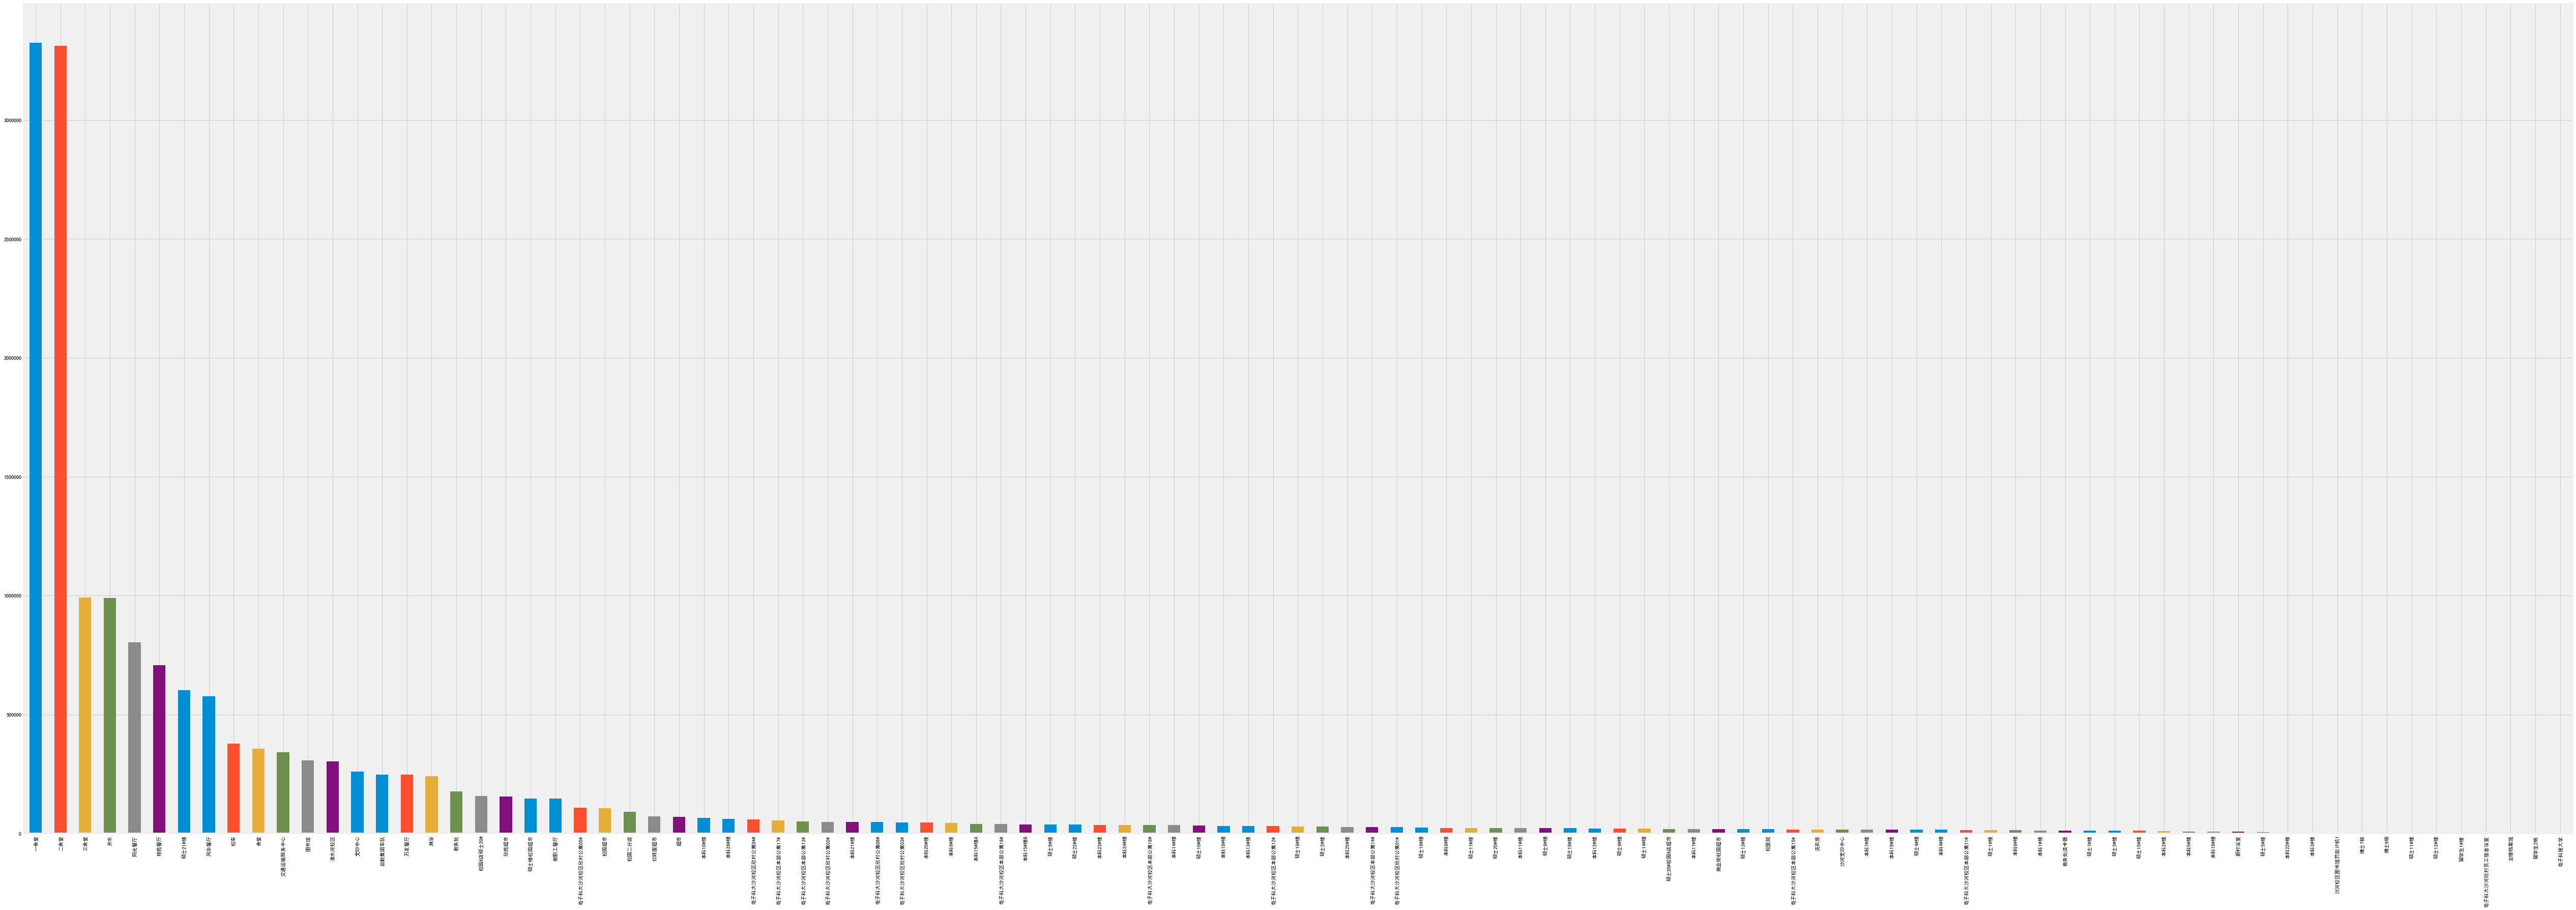

In [13]:
consum['place0'].value_counts().plot(kind='bar', figsize=(80,30))

In [16]:
matplotlib.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
matplotlib.rcParams['axes.unicode_minus']=False #用来正常显示负号

## 预测下一次
将学生数据按学号分组作为时间步，全输入网络中，特征不变，下次出险地点为标签

In [2]:
consum = pd.read_csv('../data/consumption.txt')
consum.drop(['id'], axis=1,inplace=True)
consum.dropna(subset=['student_id','brush_time'], inplace=True)
consum.fillna('',inplace=True)
consum['brush_time'] = pd.to_datetime(consum.brush_time)
consum['timeslot'] = '0'

In [3]:
consum = consum.sort_values(['brush_time'])
import re
'''
null

# 沙河校区_ 沙河图书馆 只有1类

'''
pattern = [
    '电子科技大学_(\w{3})\dF.+',
    'null_(\w+)',
    '沙河校区_(\w+)',
    '电子科技大学_(.+)POS.+',
    '电子科技大学_(.+)收费.+',
    '(.+)_.+'  # general
]
def splitplace(x):
    res = x
    for p in pattern:
        if re.match(p, x):
            res = re.findall(p, x)[0]
            return res
    if x:
        print(x)
    return res
consum['place0'] = consum.place.apply(splitplace)
t, indexer = pd.factorize(consum.place0)
consum['placei'] = t
def label_next(x):
    if x.shape[0] == 1:
        label = [np.nan]
    else:
        label = [np.nan] + x['placei'][:-1].tolist()
    x['place_next'] = label
    return x
consum = consum.groupby(['student_id']).apply(label_next)

In [4]:
consum.index = consum.brush_time
'''
sleep 0:0 6:45
breakfast 6:45 8:30
morning 8:30 11:55
noon 11:55 14:30
afternoon 14:30 17:55
dinner 17:55
night 19:30
sleep 21:55
'''  
consum.loc[consum.between_time('0:0', '6:45', include_end=False).index, 'timeslot'] = 'sleep'
consum.loc[consum.between_time('6:45', '8:30', include_end=False).index, 'timeslot'] = 'breakfast'
consum.loc[consum.between_time('8:30', '11:55', include_end=False).index, 'timeslot'] = 'morning'
consum.loc[consum.between_time('11:55', '14:30', include_end=False).index, 'timeslot'] = 'noon'
consum.loc[consum.between_time('14:30', '17:55', include_end=False).index, 'timeslot'] = 'afternoon'
consum.loc[consum.between_time('17:55', '19:30', include_end=False).index, 'timeslot'] = 'dinner'
consum.loc[consum.between_time('19:30', '21:55', include_end=False).index, 'timeslot'] = 'night'
consum.loc[consum.between_time('21:55', '0:0', include_end=False).index, 'timeslot'] = 'sleep'
consum=consum.reset_index(drop=True)
# consum.drop(['place', 'campus', 'place0', 'device_id', 'brush_time'], axis=1, inplace=True)

In [5]:
consum.drop(['place', 'campus', 'place', 'place0', 'device_id', 'device_name', 'brush_time', 'placei'], axis=1, inplace=True)
consum.dropna(subset=['place_next'], inplace=True)

In [6]:
consum.to_csv('../data/consum_cleaned_label_next.csv', index=False)

In [7]:
consum.iloc[:-2674186*2, :].to_csv('../data/tf_train_label_next.csv', index=False, header=False)
consum.iloc[-2674186*2:-2674186, :].to_csv('../data/tf_val_label_next.csv', index=False, header=False)
consum.iloc[-2674186:, :].to_csv('../data/tf_test_label_next.csv', index=False, header=False)

In [4]:
consum = pd.read_csv('../data/labelNext.csv')

In [9]:
consum

,student_id,card_id,brush_time,amount,remained_amount,trans_type,category,device_id,device_name,campus,place,timeslot,place0,placei,place_next
0,201321020302,201798,2015-09-01 00:00:04,0.40,12.63,POS消费,bath,000B83D2,淋浴,,硕士17#楼_硕士17#楼3F淋018,sleep,硕士17#楼,0,NaN
1,201422030116,263806,2015-09-01 00:00:05,0.80,24.16,POS消费,bath,000CC98A,淋浴,,电子科大沙河校区欣村公寓04#_欣村4,sleep,电子科大沙河校区欣村公寓04#,1,NaN
2,201321060411,259595,2015-09-01 00:00:08,0.50,41.99,POS消费,bath,000DA96D,淋浴,,硕士20#楼_硕士20#楼3F淋021,sleep,硕士20#楼,2,NaN
3,201521036013,331391,2015-09-01 00:00:09,0.40,138.10,POS消费,bath,000D4D75,淋浴,,电子科大沙河校区本部公寓17#_本部17#楼3F淋018,sleep,电子科大沙河校区本部公寓17#,3,NaN
4,201522035001,332090,2015-09-01 00:00:09,1.30,55.50,POS消费,bath,000D4D4A,淋浴,,电子科大沙河校区本部公寓17#_本部17#楼3F淋017,sleep,电子科大沙河校区本部公寓17#,3,NaN
5,201211030304,317566,2015-09-01 00:00:10,0.10,54.09,POS消费,bath,000BDB89,淋浴,,电子科大沙河校区欣村公寓01#_欣村1#6F 000BDB89 淋浴46,sleep,电子科大沙河校区欣村公寓01#,4,NaN
6,201522040813,326245,2015-09-01 00:00:10,0.70,62.73,POS消费,bath,000CEB53,淋浴,,硕士13#楼_硕士13#楼3F淋015,sleep,硕士13#楼,5,NaN
7,2014050205016,269830,2015-09-01 00:00:11,0.60,134.03,POS消费,bath,000C8CB8,淋浴,,本科26#楼_本科26#楼1F淋002,sleep,本科26#楼,6,NaN
8,2014220102007,343677,2015-09-01 00:00:11,0.10,25.86,POS消费,bath,000CC112,淋浴,,电子科大沙河校区本部公寓17#_本部17#楼1F淋006,sleep,电子科大沙河校区本部公寓17#,3,NaN
9,201522240124,332921,2015-09-01 00:00:11,0.70,62.50,POS消费,bath,000C8CAA,淋浴,,硕士22#楼_硕士22#楼2F淋010,sleep,硕士22#楼,7,NaN


## 中文乱码解决

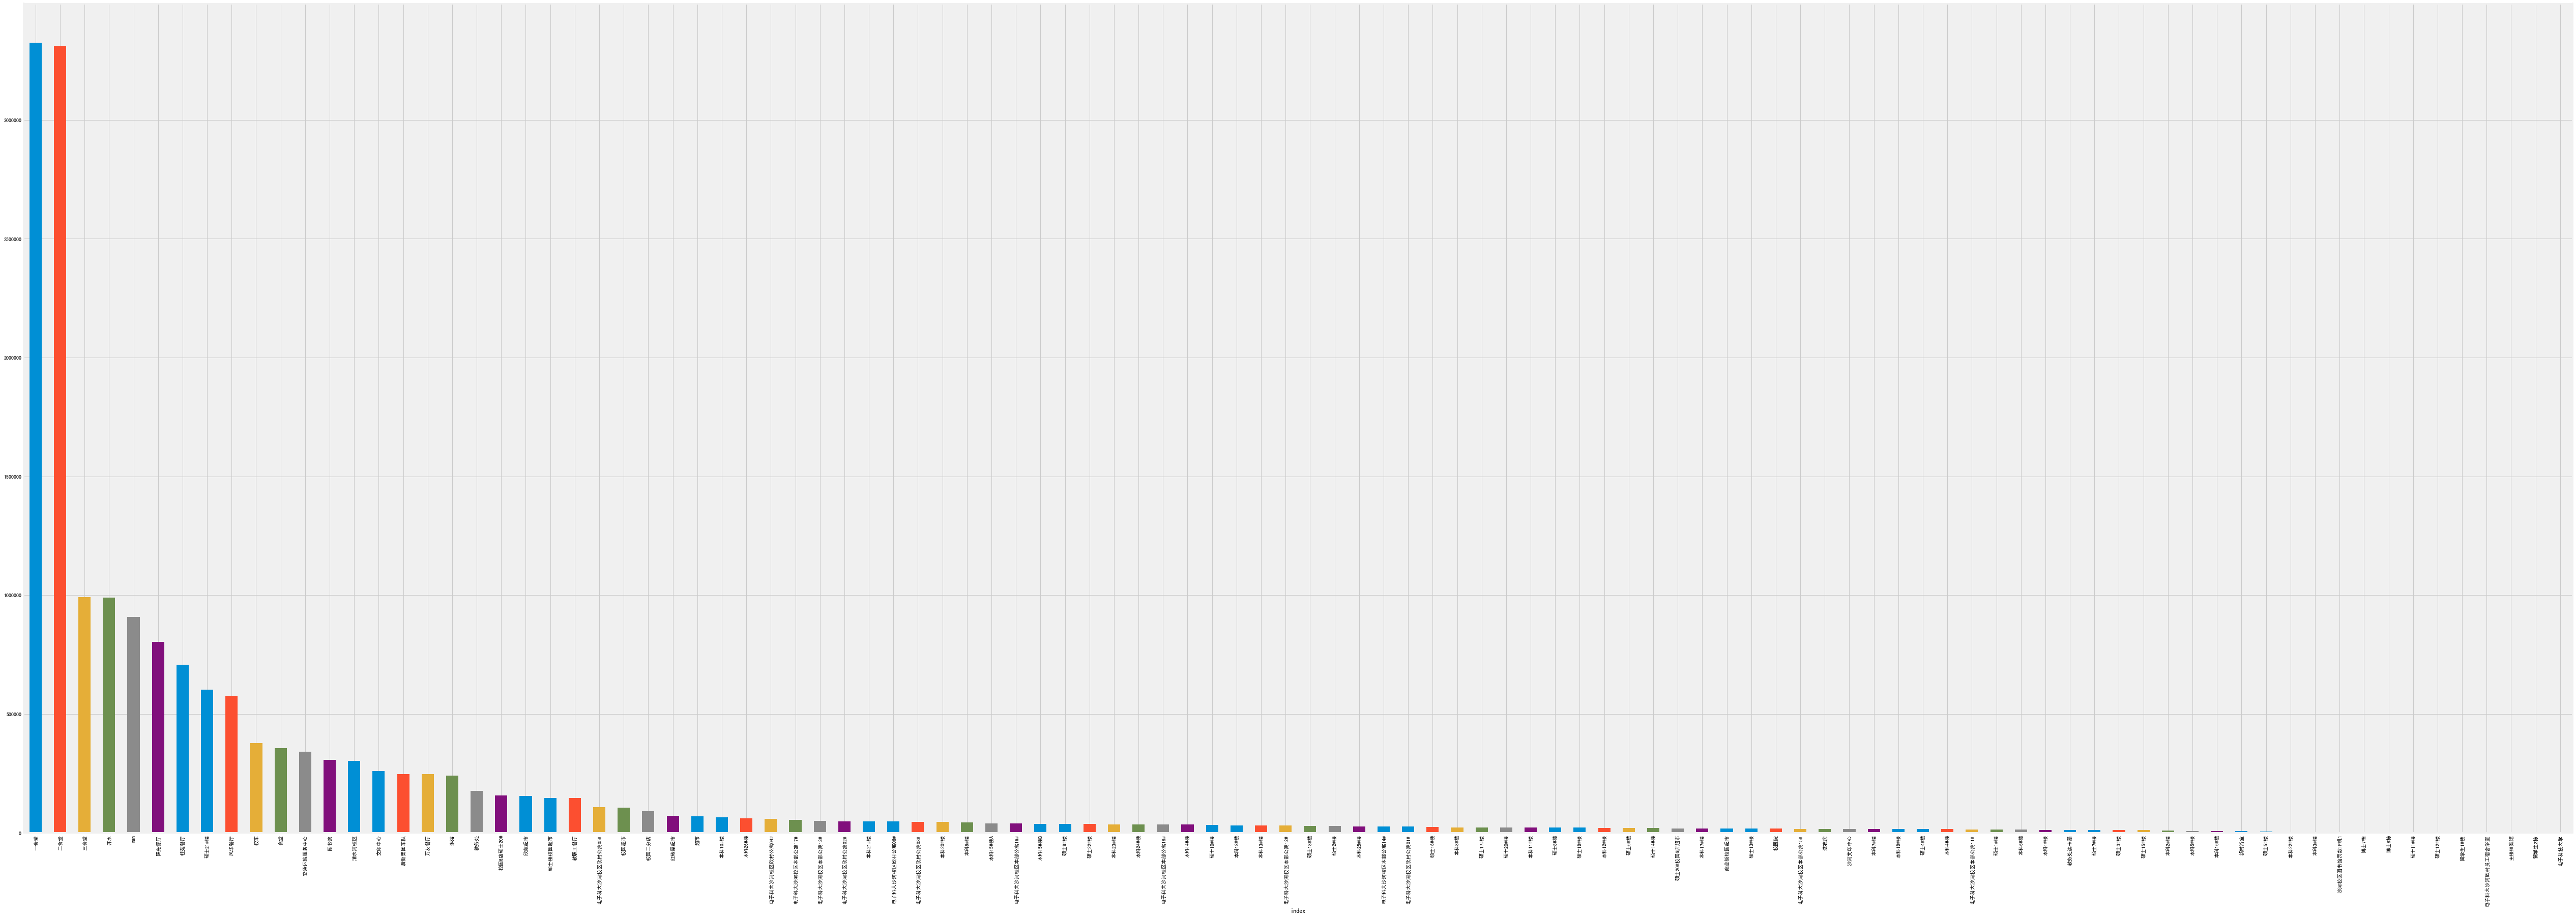

In [2]:
lc = pd.read_csv('labelcate.csv')
lc.index = lc['index']
lc['place0'].plot(kind='bar', figsize=(80,30))

In [3]:
#! /usr/bin/env python
# -*- coding: utf-8 -*-
from matplotlib.font_manager import FontManager
import subprocess

fm = FontManager()
mat_fonts = set(f.name for f in fm.ttflist)

output = subprocess.check_output('fc-list :lang=zh -f "%{family}\n"', shell=True).decode('utf8')
# print '*' * 10, '系统可用的中文字体', '*' * 10
# print output
zh_fonts = set(f.split(',', 1)[0] for f in output.split('\n'))
available = mat_fonts & zh_fonts

print ('*' * 10, '可用的字体', '*' * 10)
for f in available:
    print (f)

********** 可用的字体 **********
SimHei
